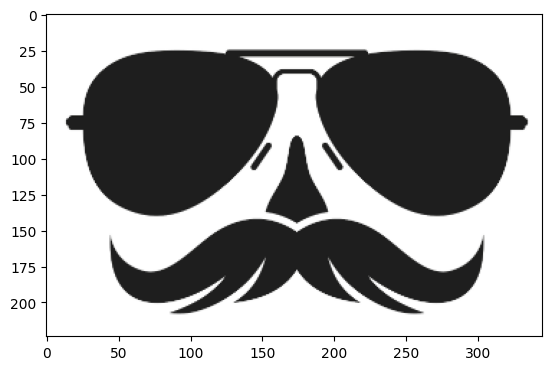

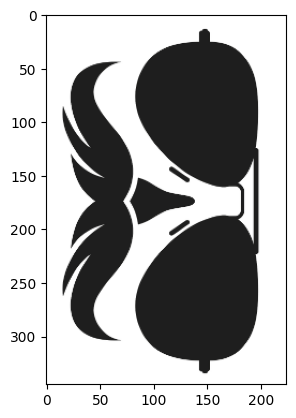

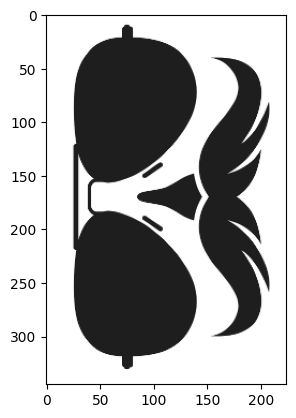

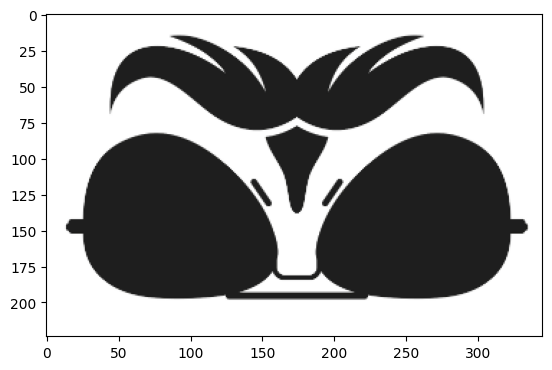

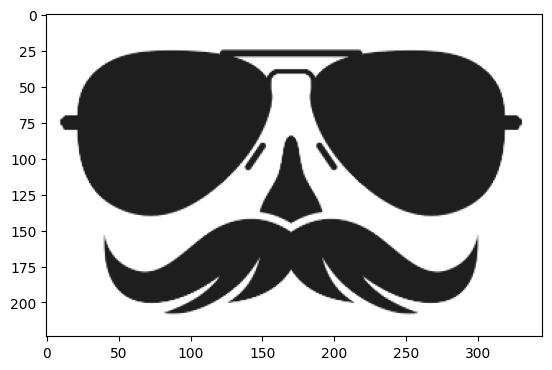

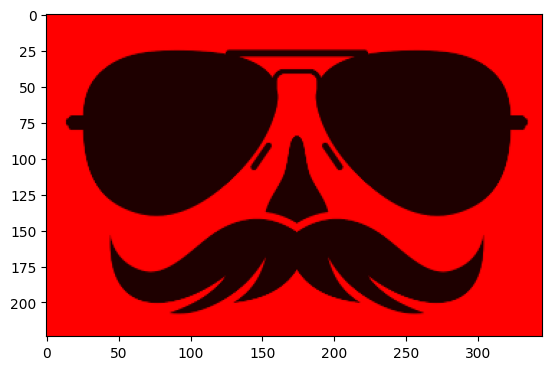

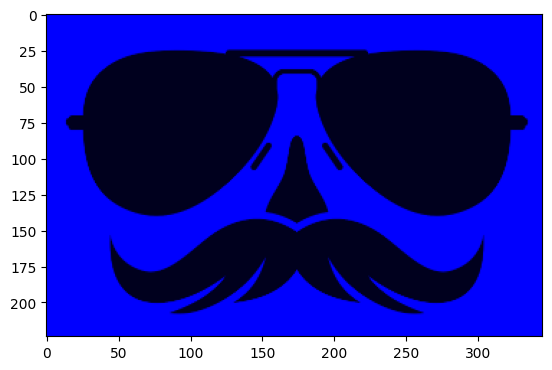

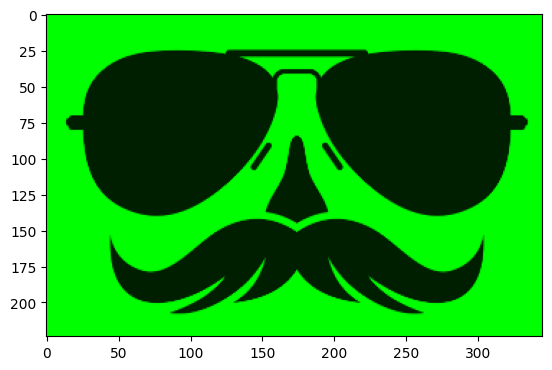

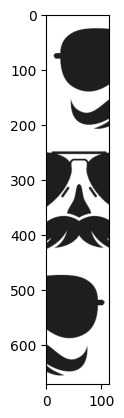

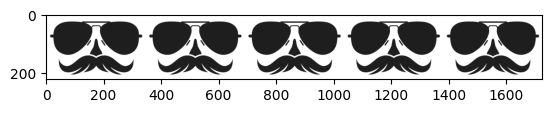

In [623]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import sys

def show(image):
    plt.imshow(image)
    plt.show()

def red(image):
    image_R = image.copy()
    image_R[:,:,[1,2]] = 0
    return image_R

def green(image):
    image_G = image.copy()
    image_G[:,:,[0,2]] = 0
    return image_G

def blue(image):
    image_B = image.copy()
    image_B[:,:,[0,1]] = 0
    return image_B

def counterclockwise(image):
    image_counterclockwise = np.rot90(image)
    return image_counterclockwise

def clockwise(image):
    image_clockwise = np.rot90(image, k=-1)
    return image_clockwise

def flip_y(image):
    image_y = np.flip(image, 1)
    return image_y

def flip_x(image):
    image_x = np.flip(image, 0)
    return image_x

def reorder(image, sequences):
    image_reorder = np.concatenate((np.split(image, sequences, axis=1)), axis = 0)
    return image_reorder

def repeat(image, repeats):
    return np.tile(image, (1, repeats, 1)) 

def Glue(*arrays):
    concatenated_array = np.concatenate(arrays, axis=1)
    return concatenated_array

loc_input_img = "Foto/cool.png"

image = Image.open(loc_input_img)

image = np.array(image)

show(image)
show(clockwise(image))
show(counterclockwise(image))
show(flip_x(image))
show(flip_y(image))
show(Red(image))
show(Blue(image))
show(Green(image))
show(reorder(image, 3))
show(multiply(image,5))

Next step - background

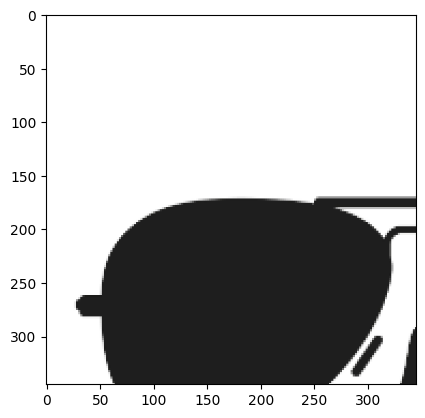

(345, 345, 3)
(345, 345, 3)


In [588]:
def kwadrant(image, kwadrant):
    image = np.repeat(np.repeat(image, 2, axis = 1), 2, axis=0)
    if kwadrant == 1:
            part = image[0:image.shape[0]//2, 0:image.shape[1]//2]
    elif kwadrant == 2:
            part = image[0:image.shape[0]//2, image.shape[1]//2:image.shape[1]]
    elif kwadrant == 3:
            part = image[image.shape[0]//2:image.shape[0], image.shape[1]//2:image.shape[1]]
    elif kwadrant == 4:
            part = image[image.shape[0]//2:image.shape[0], 0:image.shape[1]//2]
    else:
        print("The number is not an integer or not between 1 and 4.")
    return part


kwad = kwadrant(image,1)
show(kwad)
print(image.shape)
print(kwad.shape)


Sampled background pixel: [255 255 255]
Min color:[105 105 105]
Max color:[255 255 255]


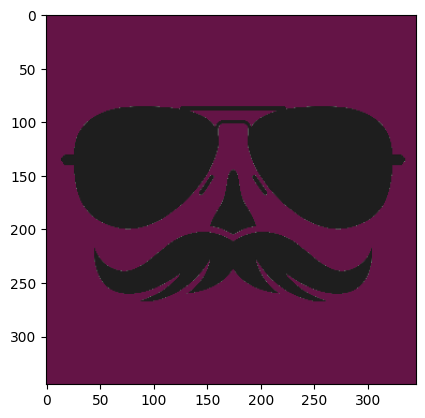

In [615]:
def background(image, color):

    if color == 1:
        color = np.array([100, 20, 70])

    background_pixel = image[5,5].astype(np.int16)

    print("Sampled background pixel:", background_pixel)

    tolerance = 150
    min_color = np.clip(background_pixel - tolerance, 0, 255)  
    print(f"Min color:{min_color}")
    max_color = np.clip(background_pixel + tolerance, 0, 255)
    print(f"Max color:{max_color}")
 
    mask = np.all((min_color <= image) & (image <= max_color), axis=-1)

    image_modified = image.copy()
    image_modified[mask] = color

    return image_modified

show(background(image, 1))


In [ ]:
def resize(image):
    shape = image.shape
    form = (shape[0]-shape[1])
    if form > 0:
        gap = form//2
        fill_1 = np.tile(image[:,1,:],(gap, 1, 1))
        fill_2 = np.tile(image[:,1,:],(gap+form%2, 1, 1))
        image_sized = np.hstack([fill_1, image, fill_2])
    elif form < 0:
        gap = abs(form)//2
        fill_1 = np.tile(image[0, :, :], (gap, 1, 1)) 
        fill_2 = np.tile(image[0, :, :], (gap+form%2, 1, 1)) 
        image_sized = np.vstack([fill_1, image, fill_2, ])
    else:
        print("No resize executed")
        return image
    return image_sized

show(kwadrant(resize(Blue(image)),1))
print(resize(image).shape)

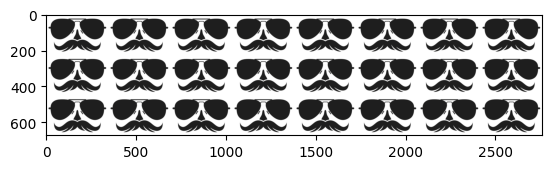

In [561]:
show(reorder(repeat(image,3*8),3))

No resize executed


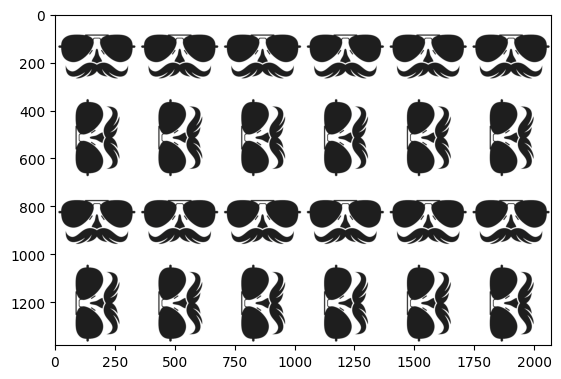

In [593]:
image = resize(image)
row1 = repeat(image,6)
row2 = repeat(counterclockwise(image),6)
show(reorder(Glue(row1, row2, row1, row2),4))


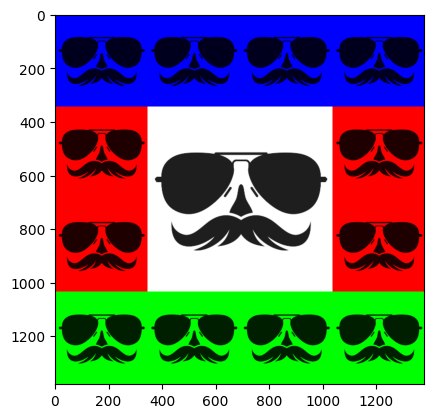

In [603]:

B = blue(image)
R = red(image)
G = green(image)
k1 = kwadrant(image,1)
k2 = kwadrant(image,2)
k3 = kwadrant(image,3)
k4 = kwadrant(image,4)

show(reorder((Glue(B,B,B,B,R,k1,k2,R,R,k4,k3,R,G,G,G,G)),4))

Sampled background pixel: [255 255 255]
Min color:[55 55 55]
Max color:[255 255 255]
Sampled background pixel: [30 30 30]
Min color:[0 0 0]
Max color:[230 230 230]


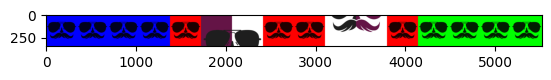

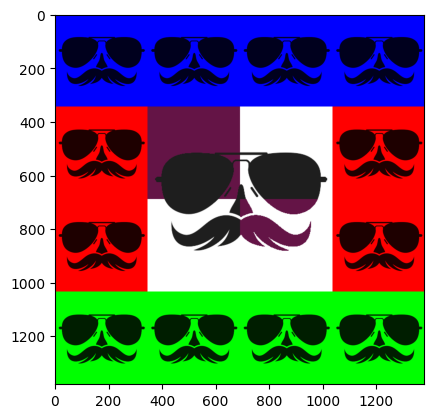

In [609]:
B = blue(image)
R = red(image)
G = green(image)
k1 = background(kwadrant(image,1),1)
k2 = kwadrant(image,2)
k3 = background(kwadrant(image,3),1)
k4 = kwadrant(image,4)

show(Glue(B,B,B,B,R,k1,k2,R,R,k4,k3,R,G,G,G,G))
show(reorder((Glue(B,B,B,B,R,k1,k2,R,R,k4,k3,R,G,G,G,G)),4))

Sampled background pixel: [255 255 255]
Min color:[55 55 55]
Max color:[255 255 255]


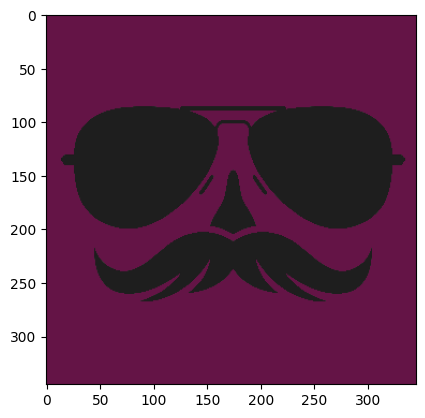

In [612]:
show(background(image, 1))

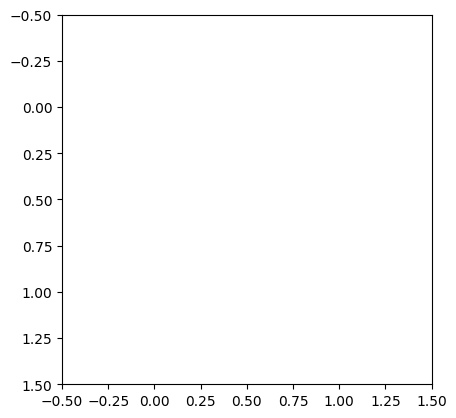

['/Users/gillesservais/Project-spelen-met-vormen',
 '/Users/gillesservais/anaconda3/lib/python311.zip',
 '/Users/gillesservais/anaconda3/lib/python3.11',
 '/Users/gillesservais/anaconda3/lib/python3.11/lib-dynload',
 '',
 '/Users/gillesservais/Project-spelen-met-vormen/.Project2/lib/python3.11/site-packages']

In [624]:
x = 20
y = 20
shape = 1
show(image[x-shape:x+shape, y-shape:y+shape])

sys.path